In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('forestfires.csv')
df.head(3)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0


In [ ]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

df['month']= label_encoder.fit_transform(df['month'])
df['day']= label_encoder.fit_transform(df['day'])


from sklearn import preprocessing


min_max_scaler = preprocessing.MinMaxScaler()
scaled = min_max_scaler.fit_transform(df)
scaled= pd.DataFrame(scaled)

df,scaled

(     X  Y  month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
 0    7  5      7    0  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
 1    7  4     10    5  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
 2    7  4     10    2  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
 3    8  6      7    0  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
 4    8  6      7    3  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
 ..  .. ..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
 512  4  3      1    3  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
 513  2  4      1    3  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
 514  7  4      1    3  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
 515  1  4      1    2  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
 516  6  3      9    5  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00
 
 [517 rows x 13 columns],
         0         1         2      

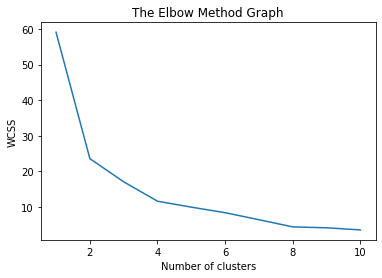

In [ ]:
X=scaled.iloc[:,[0,1]].values

import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
wcss=[] # wccs is 'within cluster sum of squares'
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='random', max_iter=300, n_init=10, random_state=42) #random_state makes sure that we always get same numbers everytime we rerun the code
    kmeans.fit(X) # fits the modelcompute k-means clustering
    wcss.append(kmeans.inertia_) # sum of squared distances of samples to their closest cluster center.

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')

plt.ylabel('WCSS')
plt.show()


In [ ]:
kmeans=KMeans(n_clusters=4)

y_kmeans=kmeans.fit_predict(X)

print(y_kmeans)

#df3['cluster']=y_kmeans

kmeans.cluster_centers_

[2 2 2 1 1 1 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 0 0 0 2 2
 2 1 1 3 3 3 3 3 3 3 3 3 3 3 3 2 2 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 0 3 1 3 0 2 2 2
 3 1 2 1 0 2 0 2 0 3 0 2 2 2 2 1 1 2 2 2 2 1 2 1 2 0 3 3 2 0 0 1 3 1 2 2 1
 0 1 0 2 2 2 0 3 0 3 0 2 0 0 0 0 2 2 1 2 0 3 2 2 2 0 2 2 2 0 0 0 3 0 2 1 0
 0 3 2 0 2 1 0 1 0 0 2 1 0 1 3 3 2 2 2 0 0 2 0 0 2 0 1 0 1 1 2 2 2 0 1 0 0
 2 0 0 0 2 0 0 2 3 0 0 3 1 0 0 1 0 0 0 0 0 0 2 2 0 2 0 1 2 2 2 0 1 0 1 1 2
 2 1 1 2 2 2 0 0 2 3 2 0 0 0 2 2 0 2 0 0 0 0 2 2 2 3 2 0 2 3 2 2 2 0 0 2 0
 3 3 0 2 2 1 0 0 1 2 1 2 3 3 2 0 2 2 0 2 2 2 0 0 2 2 3 2 0 2 0 2 2 0 0 2 0
 2 0 0 2 2 2 1 3 2 0 2 1 1 1 2 0 0 2 2 2 2 1 3 0 2 0 0 2 3 1 1 0 1 1 0 3 2
 0 0 3 2 2 1 2 2 1 2 2 0 0 1 0 1 3 1 3 1 0 3 0 2 3 1 0 3 0 1 1 0 3 2 1 2 3
 0 2 2 0 2 2 0 3 2 0 0 0 0 3 1 2 0 1 3 2 2 3 2 0 2 2 2 0 2 1 0 0 0 0 2 2 1
 0 0 1 0 0 2 2 0 0 0 0 3 

array([[0.27284264, 0.32704859],
       [0.89409722, 0.58333333],
       [0.6502809 , 0.32343499],
       [0.04642857, 0.08367347]])

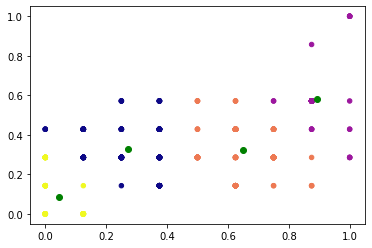

In [ ]:


plt.scatter(X[:,0], X[:,1], c=y_kmeans , cmap='plasma', s=20)    #s=seed
centroids=kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1],  c='green')
plt.show()

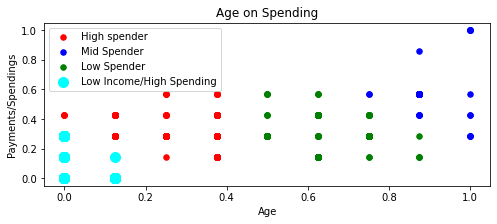

In [ ]:
plt.figure(figsize=(8,3))
plt.scatter(X[y_kmeans== 0, 0], X[y_kmeans == 0, 1], s = 30, c = 'red', label = 'High spender') #s is size of point
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 30, c = 'blue', label = 'Mid Spender')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 30, c = 'green', label = 'Low Spender')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Low Income/High Spending')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'High Income/High Spending')

plt.title('Age on Spending')
plt.xlabel('Age')
plt.ylabel('Payments/Spendings')
plt.legend(loc=0)
plt.show()

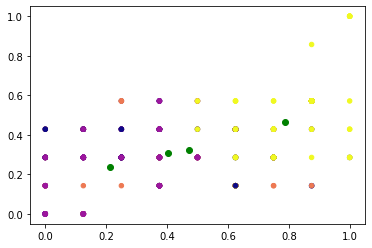

In [ ]:
X2=scaled.iloc[:,[0,1,2,3,4]].values
kmeans=KMeans(n_clusters=4)

y_kmeans=kmeans.fit_predict(X2)

plt.scatter(X2[:,0], X2[:,1], c=y_kmeans , cmap='plasma', s=20)    #s=seed
centroids=kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1],  c='green')
plt.show()

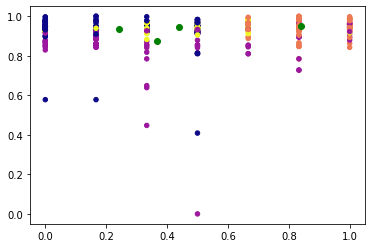

In [ ]:
X3=scaled.iloc[:,[3,4,5,6,9]].values
kmeans=KMeans(n_clusters=4)

y_kmeans=kmeans.fit_predict(X3)

plt.scatter(X3[:,0], X3[:,1], c=y_kmeans , cmap='plasma', s=20)    #s=seed
centroids=kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1],  c='green')
plt.show()

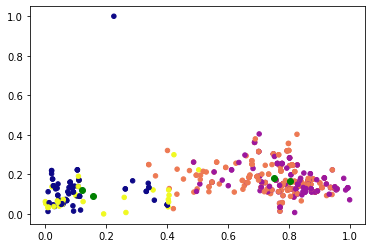

In [ ]:
X3=scaled.iloc[:,[6,7,8,9]].values
kmeans=KMeans(n_clusters=4)

y_kmeans=kmeans.fit_predict(X3)

plt.scatter(X3[:,0], X3[:,1], c=y_kmeans , cmap='plasma', s=20)    #s=seed
centroids=kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1],  c='green')
plt.show()

Tuning Parameter:

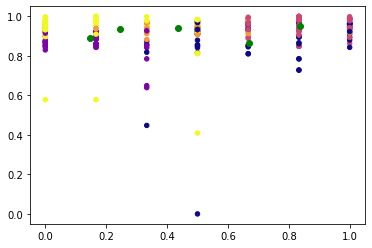

In [ ]:
#k=5
X3=scaled.iloc[:,[3,4,5,6,9]].values
kmeans=KMeans(n_clusters=5)

y_kmeans=kmeans.fit_predict(X3)

plt.scatter(X3[:,0], X3[:,1], c=y_kmeans , cmap='plasma', s=20)    #s=seed
centroids=kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1],  c='green')
plt.show()

'''plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()'''

##SVM


In [ ]:
df_svm=pd.read_csv('diabetes.csv')
df_svm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
scaled2 = min_max_scaler.fit_transform(df_svm)
scaled2= pd.DataFrame(scaled2)

In [ ]:
from sklearn.model_selection import train_test_split #method to split training and testing data sets
X_train, X_test, y_train, y_test=train_test_split(scaled2.iloc[:,[0,1,2,3,4,5,6,7]].values, scaled2.iloc[:,[8]].values , test_size=0.3, random_state=109)

In [ ]:
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print(accuracy_score(y_test, y_pred))

0.7402597402597403


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.676 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.673 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.664 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.682 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.657 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.648 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.654 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.654 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.654 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.657 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.654 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.654 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.657 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.648 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.654 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.654 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.654 total time=   0.0s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.769 total time=   0.0s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.815 total time=   0.0s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.766 total time=   0.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.766 total time=   0.0s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.738 total time=   0.0s
[CV 1/5] END ........C=1, ga

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.654 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.654 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.654 total time=   0.0s
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.657 total time=   0.0s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.648 total time=   0.0s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.654 total time=   0.0s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.654 total time=   0.0s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.654 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.657 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.648 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.654 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.654 total time=   0.0s
[CV 5/5] END .....C=1, gamma

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.796 total time=   0.0s
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.806 total time=   0.0s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.785 total time=   0.0s
[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.757 total time=   0.0s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.748 total time=   0.0s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.750 total time=   0.0s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.704 total time=   0.0s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.729 total time=   0.0s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.720 total time=   0.0s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.776 total time=   0.0s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.657 total time=   0.0s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.648 total time=   0.0s
[CV 3/5] END .....C=10, gamm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.654 total time=   0.0s
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.741 total time=   0.0s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.796 total time=   0.0s
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.738 total time=   0.0s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.738 total time=   0.0s
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.701 total time=   0.0s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.806 total time=   0.0s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.815 total time=   0.0s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.804 total time=   0.0s
[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.757 total time=   0.0s
[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.729 total time=   0.0s
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.806 total time=   0.0s
[CV 2/5] END .....C=100, gam

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.704 total time=   0.0s
[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.729 total time=   0.0s
[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.720 total time=   0.0s
[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.776 total time=   0.0s
[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.657 total time=   0.0s
[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.648 total time=   0.0s
[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.654 total time=   0.0s
[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.654 total time=   0.0s
[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.654 total time=   0.0s
[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.759 total time=   0.1s
[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.759 total time=   0.1s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.701 total time=   0.1s
[CV 4/5] END .......C=1000, 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.766 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.757 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.729 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.787 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.806 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.785 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.766 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.748 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.806 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.806 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.776 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.776 total time=   0.0s
[CV 5/5] END ...C=1000, gamm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
from sklearn.metrics import classification_report
grid_predictions = grid.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

         0.0       0.75      0.89      0.81       149
         1.0       0.70      0.45      0.55        82

    accuracy                           0.74       231
   macro avg       0.72      0.67      0.68       231
weighted avg       0.73      0.74      0.72       231



In [ ]:
print("best score",grid.best_score_)
print("SVM accuracy",accuracy_score(y_test, y_pred))

best score 0.7820179993077188
SVM accuracy 0.7402597402597403


In [ ]:
svc2=SVC(C=2, gamma=5) 


# fit classifier to training set
svc2.fit(X_train,y_train)


# make predictions on test set
y_pred2=svc2.predict(X_test)

print(accuracy_score(y_test, y_pred2))

0.7272727272727273


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
svc3=SVC(C=4, gamma=7) 


# fit classifier to training set
svc3.fit(X_train,y_train)


# make predictions on test set
y_pred3=svc3.predict(X_test)

print(accuracy_score(y_test, y_pred3))

0.7142857142857143


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
svc4=SVC(C=4, gamma=1) 


# fit classifier to training set
svc4.fit(X_train,y_train)


# make predictions on test set
y_pred4=svc4.predict(X_test)

print(accuracy_score(y_test, y_pred4))

0.7316017316017316


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
svc5=SVC(C=3, gamma=8) 


# fit classifier to training set
svc5.fit(X_train,y_train)


# make predictions on test set
y_pred5=svc5.predict(X_test)

print(accuracy_score(y_test, y_pred5))

0.7186147186147186


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


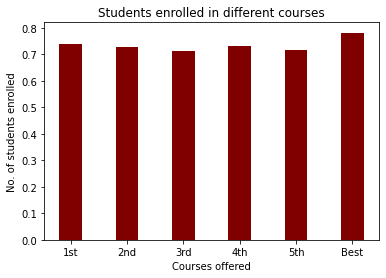

In [ ]:
plt.bar(['1st','2nd','3rd','4th','5th','Best'], [accuracy_score(y_test, y_pred),accuracy_score(y_test, y_pred2),accuracy_score(y_test, y_pred3),accuracy_score(y_test, y_pred4),accuracy_score(y_test, y_pred5),grid.best_score_], color ='maroon',
        width = 0.4)
 
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()